In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

np.set_printoptions(legacy='1.25')


# Problem Set 3: Implementer manuelt OLS-estimatoren

I dette Problem Set skal vi udvide vores forståelse af OLS-estimatoren ved selv at implementere den i Python. Til sidst vil vi stå med en hjemmelavet implementering, som i princippet kan anvendes (og udvides) i resten af kurset i stedet for at bruge `statsmodels`. 

Ugens opgaver kan løses ved blot at implementere de formler, der forsynes undervejs (og som I har udledt og studeret i forelæsningerne).

Går man i stå, kan man kigge i forelæsningskoden, hvor OLS-estimatoren også implementeres manuelt – men der er et stort læringsudbytte i at prøve at implementere den selv.

Undervejs i opgaverne kan du tjekke, at din implementering fungerer korrekt ved at køre din funktion på følgende simple testdata for $n=8$ observationer:

In [2]:
x = np.array([0.67, 0.03, -0.78,  0.95,  0.7,  -1.05, -0.37, -1.14])
y = np.array([-2.31, 2.6, -3.25, 2.24, 1.05, -2.98, -3.82, -5.29])

---

## Del 1: OLS i SLR-tilfældet (en enkelt forklarende variabel)


Når vi kun har 1 forklarende variabel og en konstant (SLR-tilfældet) arbejder vi med denne model:

$$ y_i = \beta_0 + \beta_1 x_i + u_i $$

hvor $y_i$ er den afhængige variabel, $x_i$ er den forklarende variabel, $u_i$ er fejlledet, og $\beta_0$ og $\beta_1$ er modelparametre. Vi observerer kun $x$ og $y$, mens fejlledet og parametrene er ukendte.

Såfremt vores model er korrekt specificeret, da ved vi fra den økonometriske teori, at den sande værdi af $\beta_1$ er givet ved:

$$ \beta_1 = \frac{{\text{Cov}}(x, y)} {\text{Var}(x)}  $$

Vi ved også fra forelæsningerne, at vi med en stikprøve at $x,y$ observationer kan estimere kovariansen og variansen sådan her:

\begin{align*}
\widehat{\text{Cov}}(x,y)  = \frac{1}{n} \sum (x_i - \bar{x})(y_i - \bar{y}) \\
\widehat{\text{Var}}(x) = \frac{1}{n} \sum (x_i - \bar{x})^2
\end{align*}

hvor $\bar{x}$ og $\bar{y}$ er de empiriske gennemsnit af $x, y$ i vores datasæt.  Sætter vi alt dette sammen ved hjælp af Analogi-princippet, betyder det at vi kan estimere $\hat{\beta}_1$ med formlen:
$$
\hat{\beta}_1 = \frac{{\widehat{\text{Cov}}}(x, y)} {\widehat {\text{Var}}(x)}  = \frac{\sum (x_i - \bar{x})(y_i - \bar{y}) }{ \sum (x_i - \bar{x})^2} \tag{1}
$$

Dette er OLS-estimatoren for $\hat{\beta}_1$ i SLR-tilfældet.



### Opgave 1.1
Skriv en funktion `OLS_SLR()`, hvor du manuelt implementerer OLS-estimatoren for $\hat{\beta}_1$ i SLR-tilfældet. Brug NumPy i din implementering. Funktionen skal tage $x$ og $y$ som argumenter, hvor $x$ er et $(n \times 1)$ NumPy-array og $y$ er et $(n \times 1)$ NumPy-array. Funktionen skal returnere skalar-værdien $\hat \beta_1$. 

Når du kører din funktion på testdataen, bør du få estimatet $\hat\beta_1 = 2.68...$

_Hints:_ 
- Du kan bruge NumPy-funktionen `np.mean()` til at beregne gennemsnittet af et NumPy-array og `np.sum()` til at beregne summen over et NumPy-array.



**Din kode**

In [3]:
def OLS_SLR(x,y):
    x_bar = np.mean(x)
    y_bar = np.mean(y)

    cov_xy = np.sum((x - x_bar)*(y - y_bar)) 
    var_x  = np.sum((x - x_bar)**2)

    beta1hat = cov_xy / var_x

    return beta1hat


OLS_SLR(x,y)

2.680398073836276

---


Fra den økonometriske teori ved vi også, at vi kan estimere interceptet $\beta_0$ med formlen:
$$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} $$

Reflekter et øjeblik over formlen:  Interceptet $\hat \beta_0$ er skæringspunktet på $y$-aksen, dvs. vores forventning til $y$ når $x$ er lig 0. Vi finder interceptet ved at tage gennemsnittet over vores $y$-observationer, dvs. $\overline y$, og så fratrække den estimerede effekt af den gennemsnitlige $x$-observation, dvs. $\hat \beta_1 \overline x$. 

Hvis du virkelig vil overbevise dig selv om intuitionen i formlen, så tegn et tilfældigt scatter plot på et stykke papir, tegn den bedste lige linje (en OLS-linje) igennem observationerne og se selv hvor linjen skærer $y$-aksen.

### Opgave 1.2


Udvid din `OLS_SLR()` funktion så den returnerer ikke bare $\hat{\beta}_1$, men en tuple der indeholder ${(\hat\beta_0, \hat\beta_1)}$. Når du kører din udvidede funktion på samme testdata som før, bør du få estimaterne ${(\hat\beta_0 = -1.13..., \hat\beta_1 = 2.68...)}$

In [4]:
def OLS_SLR(x,y):
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    n = len(x)

    cov_xy = np.sum((x - x_bar)*(y - y_bar)) / n
    var_x  = np.sum((x - x_bar)**2) / n

    beta1hat = cov_xy / var_x
    beta0hat = y_bar - beta1hat*x_bar
    
    return (beta0hat, beta1hat)

OLS_SLR(x,y)

(-1.1383007383627606, 2.680398073836276)

---

### Opgave 1.3

Vi skal nu beregne de prædikterede værdier $\hat y$ på baggrund af vores parameterestimater. Udvid din funktion, så den også returnerer et $(n \times 1)$-NumPy indeholdene $\hat y$, dvs:

$$ \hat{y} = \hat \beta_0 + \hat \beta_1 x $$

Funktionen skal altså returnere tuplen $(\hat \beta_0, \hat \beta_1, \hat y)$, hvor $\hat \beta_0$ er en skalar, $\hat \beta_1$ er en skalar og $\hat y$ er en vektor (siden der hører én prædikteret værdi til hver observation af $x$). Hvis du har implementeret funktionen korrekt, skulle du gerne få at 
$${\hat\beta_0 = -1.13..., \quad  \hat\beta_1 = 2.68...}$$
$$\hat y = (0.65..., -1.05..., -3.22...,  1.40..., 0.73...,
        -3.95..., -2.13..., -4.19...)$$

**Din kode her**


In [5]:
def OLS_SLR(x,y):
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    n = len(x)

    cov_xy = np.sum((x - x_bar)*(y - y_bar)) / n
    var_x  = np.sum((x - x_bar)**2) / n

    beta1hat = cov_xy / var_x
    beta0hat = y_bar - beta1hat*x_bar

    yhat = beta0hat + beta1hat*x
    
    return (beta0hat, beta1hat, yhat)

OLS_SLR(x,y)

(-1.1383007383627606,
 2.680398073836276,
 array([ 0.65756597, -1.0578888 , -3.22901124,  1.40807743,  0.73797791,
        -3.95271872, -2.13004803, -4.19395454]))

---

Siden OLS-linjen er defineret ved vores prædiktioner $\hat y$, har vi nu  alt, hvad vi behøver for at kunne tegne vores OLS-linje i et scatter plot af vores (x,y)-observationer.

Kør nedenstående celle for at se resultatet. 

(Bemærk, at vi udpakker outputtet fra funktion med koden `beta0hat, beta1hat, yhat = OLS_SLR(X,Y)`)


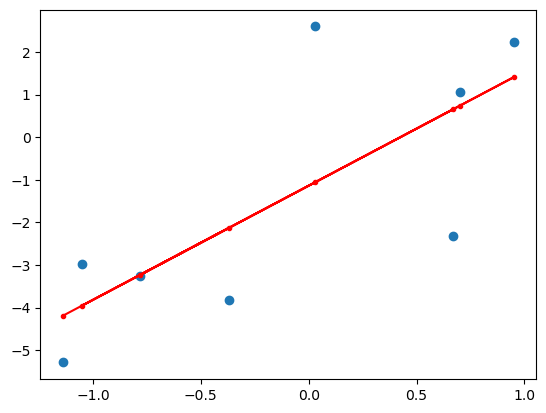

In [6]:
beta0hat, beta1hat, yhat = OLS_SLR(x,y)

plt.scatter(x,y)
plt.plot(x, yhat, color='red', marker='.');

### Opgave 1.4

Betragt ovenstående plot og tjek, at du har styr på den basale intuition. Hvor på figuren kan du aflæse $\hat y$? Hvad med $\hat \beta_0$ og $\hat \beta_1$? Hvor er residualerne $\hat u_i$?

**Dit svar her**



> - $\hat y$ aflæses som de små punkter langs den røde OLS-linjen, som implicit definerer OLS-linjen. Der hører én prædiktion til hvert observeret $x$-værdi: $\hat y_i = \hat \beta_0 + \hat \beta_1 x_i$.
> - $\hat \beta_0$ aflæses som skæringspunktet mellem den røde OLS-linje og $y$-aksen (der hvor $x=0$).
> - $\hat \beta_1$ aflæses som den røde OLS-linjes hældningskoefficient
> - Residualerne $\hat u_i$ aflæses som den vertikale afstand mellem hver observation $(x,y)$ og den tilhørende prædiktion $(x,\hat y)$, det vil sige forskellen $y - \hat y$.

---

### Opgave 1.5

Vi kan implicit aflæse residualerne af figuren fra forrige opgave, men lad os udvide vores funktion, så den også beregner og returnerer residualerne. Residualerne skal vi senere bruge til at beregne modellens forklaringsgrad og til at beregne standardfejl til vores parameterestimater.

Residualerne er den del af $y$, som vores model ikke forklarer, dvs:

\begin{align*} 
\hat u &= y - \hat y \\
&=  y - \hat \beta_0 - \hat \beta_1 x
\end{align*}

 Husk, at der er én residual til hver $(x,y)$ observation, så outputtet af din funktion skal nu rumme et ekstra NumPy-array bestående af $(n \times 1)$-elementer.

Hvis du har løst opgaven korrekt, skal du få residualerne
$$
\hat u = (-2.96...,  3.65... , -0.02...,  0.83...,  0.31...,
         0.97..., -1.68..., -1.09...)
$$

**Din kode**


In [7]:
def OLS_SLR(x,y):
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    n = len(x)

    cov_xy = np.sum((x - x_bar)*(y - y_bar)) / n
    var_x  = np.sum((x - x_bar)**2) / n

    beta1hat = cov_xy / var_x
    beta0hat = y_bar - beta1hat*x_bar

    yhat = beta0hat + beta1hat*x
    uhat = y - yhat
    
    return (beta0hat, beta1hat, yhat, uhat)

OLS_SLR(x,y)

(-1.1383007383627606,
 2.680398073836276,
 array([ 0.65756597, -1.0578888 , -3.22901124,  1.40807743,  0.73797791,
        -3.95271872, -2.13004803, -4.19395454]),
 array([-2.96756597,  3.6578888 , -0.02098876,  0.83192257,  0.31202209,
         0.97271872, -1.68995197, -1.09604546]))

---

### Opgave 1.6:
Det begynder at blive lidt svært at holde styr på alt det output, som vores funktion returnerer. Udvid din funktion, så den pænt printer hvert resultat med en deskriptiv titel, og gerne afrundet til et fornuftigt antal decimaler. Når du kører din funktion på testdataen, skal du gerne få et output i stil med:

```plain
beta0hat = -1.1383
beta1hat = 2.6804
yhat = [ 0.66 -1.06 -3.23  1.41  0.74 -3.95 -2.13 -4.19]
uhat = [-2.97  3.66 -0.02  0.83  0.31  0.97 -1.69 -1.1 ]
```

_Hint:_ Her kan det være en god ide at bruge en f-string i Python. Se fx følgende eksempel på, hvordan du let kan printe og formatere variable ved hjælp af f-strings:


```py
abc = 123.456789

print(f'Min variabels værdi er: {abc}')
>> Min variabels værdi er: 123.456789

print(f'Min variabels navn og værdi er: {abc = }')
>> Min variabels navn og værdi er: abc = 123.456789

print(f'Min variabels navn og afrundede værdi er: {abc = :.2f}')
>> Min variabels navn og afrundede værdi er: abc = 123.46
```

In [8]:
def OLS_SLR(x,y):
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    n = len(x)

    cov_xy = np.sum((x - x_bar)*(y - y_bar)) / n
    var_x  = np.sum((x - x_bar)**2) / n

    beta1hat = cov_xy / var_x
    beta0hat = y_bar - beta1hat*x_bar

    yhat = beta0hat + beta1hat*x
    uhat = y - yhat

    print(f'{beta0hat = :.4f}')
    print(f'{beta1hat = :.4f}')
    print(f'yhat = {yhat.round(2)}')
    print(f'uhat = {uhat.round(2)}')

OLS_SLR(x,y)

beta0hat = -1.1383
beta1hat = 2.6804
yhat = [ 0.66 -1.06 -3.23  1.41  0.74 -3.95 -2.13 -4.19]
uhat = [-2.97  3.66 -0.02  0.83  0.31  0.97 -1.69 -1.1 ]


---

### Opgave 1.7
Udvid din funktion, så den også beregner modellens forklaringsgrad $R^2$. Forklaringsgraden $R^2$ er defineret som den forklarede del af den totale variation i $y$:

\begin{align*} 
    R^2 &\equiv \frac{SSE}{SST} \\ 
        &= 1 - \frac{SSR}{SST}
\end{align*}

hvor _Total Sum of Squares_ er

$$
SST = \sum_{i=1}^n (y_i - \overline{y})^2,
$$

mens _Explained Sum of Squares_ er

$$
SSE = \sum_{i=1}^n (\hat y_i - \overline{y})^2,
$$

og _Sum of Squared Residuals_ er

$$
SSR = \sum_{i=1}^n \hat u_i^2. \\
$$

Læg mærke til, at per definition er $SSE \leq SST$, og derfor er $R^2 \in [0,1]$. Intutionen bag dette forhold er, at modellen aldrig kan forklare mere af variationen i $y$ end den totale variation.

Du skulle gerne få resultatet

$$
R^2 = 0.5555
$$

**Din kode her**


In [9]:
def OLS_SLR(x,y):
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    n = len(x)

    cov_xy = np.sum((x - x_bar)*(y - y_bar)) / n
    var_x  = np.sum((x - x_bar)**2) / n

    beta1hat = cov_xy / var_x
    beta0hat = y_bar - beta1hat*x_bar

    yhat = beta0hat + beta1hat*x
    uhat = y - yhat

    SST = np.sum((y - y_bar)**2)
    SSE = np.sum((yhat - y_bar)**2)
    SSR = np.sum(uhat**2)

    R2 = SSE / SST

    print(f'{beta0hat = :.4f}')
    print(f'{beta1hat = :.4f}')
    print(f'yhat = {yhat.round(2)}')
    print(f'uhat = {uhat.round(2)}')
    print(f'{R2 = :.4f}')

OLS_SLR(x,y)

beta0hat = -1.1383
beta1hat = 2.6804
yhat = [ 0.66 -1.06 -3.23  1.41  0.74 -3.95 -2.13 -4.19]
uhat = [-2.97  3.66 -0.02  0.83  0.31  0.97 -1.69 -1.1 ]
R2 = 0.5555


---

Det sidste trin er at beregne standardfejlene for vores OLS-estimater. 

Vi bruger først residualerne til at beregne residualvariansen $\hat \sigma^2$:

$$
\hat{\sigma}^2 = \frac{1}{n-2} \cdot SSR = \frac{1}{n-2} \sum_{i=1}^{n} \hat{u}_i^2
$$

som vi kan bruge til at beregne variansen af OLS-estimatorerne:
$$
\text{Var}(\hat{\beta}_1 \mid X) = \frac{\hat{\sigma}^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$
$$
\text{Var}(\hat{\beta}_0 \mid X) = \frac{\hat{\sigma}^2 \cdot \frac{1}{n}\sum_{i=1}^{n}x_{i}^{2}}{\sum_{i=1}^{n}(x_i - \bar{x})^2}
$$

Standardfejlene er ganske enkelt kvadratrødderne af disse varianser:
$$
\text{se}(\hat{\beta}_1) = \sqrt{\text{Var}(\hat{\beta}_1 \mid X)}
$$
$$
\text{se}(\hat{\beta}_0) = \sqrt{\text{Var}(\hat{\beta}_0 \mid X)}
$$

Hvis du har brug for en genopfriskning af, hvad standardfejlene betyder, og hvorfor de beregnes på denne måde, så er dette et godt tidspunkt at genbesøge ugens forelæsningsslides.

(Bemærk, at vi her antager _homoskedasticitet_ (SLR.5). Vi antager altså, at residualvariansen er konstant og ikke fx er større, når $x$ er stor. Senere i kurset vil vi lære at estimere robuste standardfejl, som tager højde for eventuel heteroskedasticitet ved at anvende en udvidet formel for standardfejlene).

### Opgave 1.8
Udvid din `OLS_SLR()` funktion så den også returnerer standardfejlene af koefficienterne. Når du kører funktionen på samme testdata som før, skulle du gerne få:

$$ \text{se}(\hat \beta_0) = 0.7730, \quad \text{se}(\hat \beta_1) = 0.9788  $$

_Hint_: Du kan finde $n$ ved at bruge kommandoen `len(x)`.

_Hint_: Brug funktionen `np.sqrt()` til at tage kvadratroden.

_Hint_: Siden vi skal bruge størrelsen $\sum_{i=1}^n (x_i - \bar{x})^2$ flere gange undervejs, kan du med fordel gemme den som en variabel, som du fx kan kalde `SSTx`


In [10]:
def OLS_SLR(x,y):
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    n = len(x)

    cov_xy = np.sum((x - x_bar)*(y - y_bar)) / n
    var_x  = np.sum((x - x_bar)**2) / n

    beta1hat = cov_xy / var_x
    beta0hat = y_bar - beta1hat*x_bar

    yhat = beta0hat + beta1hat*x
    uhat = y - yhat

    SST = np.sum((y - y_bar)**2)
    SSE = np.sum((yhat - y_bar)**2)
    SSR = np.sum(uhat**2)

    R2 = SSE / SST

    sigma2 = np.sum(uhat**2) * 1/(n-2)
    SSTx = np.sum((x - x_bar)**2)

    var_beta1 = sigma2 / SSTx
    var_beta0 = sigma2 * np.mean(x**2) / SSTx

    se_beta1hat = np.sqrt(var_beta1)
    se_beta0hat = np.sqrt(var_beta0)

    print(f'{beta0hat = :.4f}')
    print(f'{beta1hat = :.4f}')
    print(f'yhat = {yhat.round(2)}')
    print(f'uhat = {uhat.round(2)}')
    print(f'{R2 = :.4f}')
    print(f'{se_beta0hat = :.4f}')
    print(f'{se_beta1hat = :.4f}')


OLS_SLR(x,y)

beta0hat = -1.1383
beta1hat = 2.6804
yhat = [ 0.66 -1.06 -3.23  1.41  0.74 -3.95 -2.13 -4.19]
uhat = [-2.97  3.66 -0.02  0.83  0.31  0.97 -1.69 -1.1 ]
R2 = 0.5555
se_beta0hat = 0.7730
se_beta1hat = 0.9788


---

### Opgave 1.9

Tilpas afslutningsvist din funktion, så den i stedet for at printe alle resultaterne i stedet returnerer en dictionary, som indeholder alle de størrelser, vi har arbejdet med i delopgave 1 – dvs. parameterestimaterne, deres standardfejl, de prædikterede værdier, residualerne, $R^2$ samt SST, SSE og SSR.

Ved at samle resultaterne i en dictionary kan man nemt slå op i outputtet og tilgå det element, man skal bruge.

**Din kode her**


In [11]:
def OLS_SLR(x,y):
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    n = len(x)

    cov_xy = np.sum((x - x_bar)*(y - y_bar)) / n
    var_x  = np.sum((x - x_bar)**2) / n

    beta1hat = cov_xy / var_x
    beta0hat = y_bar - beta1hat*x_bar

    yhat = beta0hat + beta1hat*x
    uhat = y - yhat

    SST = np.sum((y - y_bar)**2)
    SSE = np.sum((yhat - y_bar)**2)
    SSR = np.sum(uhat**2)

    R2 = SSE / SST

    sigma2 = np.sum(uhat**2) * 1/(n-2)
    SSTx = np.sum((x - x_bar)**2)

    var_beta1 = sigma2 / SSTx
    var_beta0 = sigma2 * np.mean(x**2) / SSTx

    se_beta1hat = np.sqrt(var_beta1)
    se_beta0hat = np.sqrt(var_beta0)

    return {
        'beta0hat': beta0hat,
        'beta1hat': beta1hat,
        'se_beta0hat': se_beta0hat,
        'se_beta1hat': se_beta1hat,
        'yhat': yhat,
        'uhat': uhat,
        'R2': R2,
        'SST': SST,
        'SSE': SSE,
        'SSR': SSR,
        
    }


OLS_SLR(x,y)

{'beta0hat': -1.1383007383627606,
 'beta1hat': 2.680398073836276,
 'se_beta0hat': 0.7730380067399938,
 'se_beta1hat': 0.9788330454642955,
 'yhat': array([ 0.65756597, -1.0578888 , -3.22901124,  1.40807743,  0.73797791,
        -3.95271872, -2.13004803, -4.19395454]),
 'uhat': array([-2.96756597,  3.6578888 , -0.02098876,  0.83192257,  0.31202209,
         0.97271872, -1.68995197, -1.09604546]),
 'R2': 0.5555101205315474,
 'SST': 62.94840000000001,
 'SSE': 34.96847327126806,
 'SSR': 27.979926728731943}

---

### Opgave 1.10
Brug `sm.OLS()` funktionen fra statsmodels-pakken til at estimere samme model på testdataen og bekræft at dine koefficienter, standardfejl og forklaringsgraden stemmer overens med dine egne resultater.

In [12]:
X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     7.499
Date:                Sun, 07 Sep 2025   Prob (F-statistic):             0.0338
Time:                        14:28:38   Log-Likelihood:                -16.360
No. Observations:                   8   AIC:                             36.72
Df Residuals:                       6   BIC:                             36.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1383      0.773     -1.473      0.1

---


## Del 2: OLS i MLR-tilfældet (Når vi har flere forklarende variable)


I det generelle tilfælde hvor vi har flere forklarende variable (MLR), ser modellen sådan her ud:

$$y_i = \beta_0 + \beta_1 x_{1 i}+ \beta_2 x_{2 i} +  \dots + \beta_k x_{k i} + u_i$$

Da ved vi at OLS-estimatoren kan skrives på matrix-form ved følgende formel, som nok er den vigtigste formel at kunne i hele det her kursus:

$$ {\hat {\beta}} = (X' X)^{-1} {X'} y $$

Her gælder at:
- $n$ er antallet af observationer. 
- $k$ er antallet af forklarende variable.
- ${\hat{\beta}}$ er en $ (k+1) \times 1 $ **vektor** af koefficientestimater (vi plusser $k$ med 1 for at gøre plads til konstantleddet)
- $X$ er en $ n \times (k+1) $ matrix indeholdende vores observationer af forklarende variable, hvor den første søjle er fyldt med 1-taller for at fange konstantledet.
- $y$ er en $ n \times 1 $ vektor som indeholder vores observationer af de afhængige variable





### Opgave 1.1 

Sammenlign OLS-estimatoren for $\hat \beta_1$ i SLR-tilfældet og for $ {\hat \beta}$ i MLR-tilfældet. Kig på tælleren og nævneren i de to formler. Kan du  genkende et mønster?

SLR:
$$ \hat \beta_1 = \frac{{\widehat {\text{Cov}}}(x, y)} {\widehat{\text{Var}}(x)}  $$

MLR:
$$ \hat {\beta} = (X'X)^{-1} {X'} y $$


**Dit svar:**

> MLR formlen er en generalisering af SLR-formlen. Tælleren ${X'} y $ i MLR-tilfældet er analog til tælleren $\widehat {\text{Cov}(x,y)}$ i SLR-tilfældet. Tilsvarende er "nævneren" $X' X$ (læg mærke til at vi tager den inverse i formlen) i MLR-tilfældet analog til nævneren ${\widehat{\text{Var}}(x)}$ i SLR-tilfældet. 




---

I de følgende opgaver får vi brug for noget ny data at teste vores funktion på, som rummer flere forklarende variable. Kør derfor nedenstående celle for at generere testdataen. Du behøver ikke at kunne forstå, hvad der foregår her:

In [13]:
np.random.seed(42)
n = 8
cov = np.array([
    [1,.5,.25],
    [.5,1,-.1],
    [.25,-.1,1]]
)

X = np.random.multivariate_normal((0,.5,1), cov,n)
ones = np.ones(n).reshape((n,1))
X = np.hstack((ones, X))

u = np.random.normal(0, 1, n)

beta = np.random.normal(1, 1, 4)

y = X @ beta + u
# y = y.reshape((n,1))

print('X = ')
print(f'{X.round(2)}')

print('y = ')
print(f'{y.round(2)}')

X = 
[[ 1.   -0.15 -0.22  0.84]
 [ 1.   -1.44 -0.74  0.86]
 [ 1.   -1.71 -0.24 -0.03]
 [ 1.   -0.63  0.04  1.4 ]
 [ 1.   -0.73  0.13  3.13]
 [ 1.    0.76  0.37  2.02]
 [ 1.    1.6   0.02  2.21]
 [ 1.   -0.41  1.27  1.34]]
y = 
[-0.13 -0.35 -0.5   1.16 -0.03  0.89 -0.16  4.89]


### Opgave 1.2
Skriv en funktion `OLS()`, hvor du manuelt implementerer OLS estimatoren i MLR-tilfældet ved hjælp af NumPy. Funktionen skal tage $X$ og $y$ som argumenter, hvor $X$ er et $n \times (k+1)$ NumPy-array og $y$ er et $n \times 1$ NumPy-array. Funktionen skal returnere et $(k+1) \times 1$ NumPy-array $\hat{\beta}$.

_Hints:_ 
- Du kan gange matricer sammen i NumPy ved hjælp af @ operatoren. Hvis du for eksempel har to kompatible matricer A og B, kan du bruge koden `A @ B` til at beregne matrix-produktet. @ operatoren fungerer også til matrix-vektor produkter.

- Du kan transponere en matrix i NumPy ved at tilføje `.T` til sidst. For eksempel returnerer `A.T` den transpose af matricen A.
- Du kan invertere en matrix med `np.linalg.inv()` metoden. For eksempel returnerer `np.linalg.inv(A)` den inverse af matricen A.

Hvis du løser opgaven korrekt, skulle du gerne få estimaterne

$$ \hat \beta = \begin{pmatrix} 0.86... \\ -0.23... \\ 3.05...\\  -0.31... \end{pmatrix}$$

**Din kode:** 

In [14]:
def OLS(X,y):
    betahat = np.linalg.inv(X.T @ X) @ X.T @ y
    return betahat

print(OLS(X,y))

[ 0.86510321 -0.23327914  3.05243859 -0.3189416 ]


### Opgave 1.3
Lad os ligesom før formatere funktionens output med nogle deskriptive titler, sådan at vi let kan aflæse, hvilken værdi der hører til $\hat \beta_0, \hat \beta_1$ og $\hat \beta_2$.

_Hint:_ Du kan gøre dette ved at loope over indholdet af din `beta_hat`-vektor og printe hvert element med en f-string.

In [15]:
def OLS(X,Y):
    betahat = np.linalg.inv(X.T @ X) @ X.T @ Y
    for i, beta in enumerate(betahat):
        print(f'beta{i}: {beta :>.4f}')
beta = OLS(X,y)
beta


beta0: 0.8651
beta1: -0.2333
beta2: 3.0524
beta3: -0.3189


---

I MLR tilfældet kan $(n \times 1)$-vektoren af prædikterede værdier $\hat y$ beregnes ved formlen

\begin{align*} 
\hat{y} &\equiv  \hat \beta_0 + \hat \beta_1 x_1 + \hat \beta_2 x_2 + ... + \hat \beta_k x_k 
\\ &= X {\hat{\beta}},
\end{align*}

hvor $X \hat \beta$ er et matrix-vektor produkt, idet $X$ er en matrix og $\hat \beta$ er en vektor.

Vi kan også let beregne  $(n \times 1)$-vektoren af residualer $\hat u$ beregnes ved formlen



\begin{align*} 
\hat{u} &\equiv  y - \hat \beta_0 - \hat \beta_1 x_1 - \hat \beta_2 x_2 - ... - \hat \beta_k x_k 
\\ &= y - X {\hat{\beta}},
\end{align*}

### Opgave 1.4
Udvid din funktion, så den også beregner de prædikterede værdier og residualerne. Du skulle gerne få:

$$
\hat y = (-0.02..., -1.31...,  0.54...,  0.69...,  0.43...,  1.18..., -0.15...,  4.41...)'
$$
og
$$
 \hat u = (-0.10...,  0.96..., -1.03...,  0.47..., -0.46..., -0.30..., -0.00...,  0.46...)'
$$


In [16]:
def OLS(X,y):
    betahat = np.linalg.inv(X.T @ X) @ X.T @ y
    yhat = X@betahat
    uhat = y - X @ betahat

    for i, beta in enumerate(betahat):
        print(f'beta{i}: {beta :>.4f}')

    print(f'yhat = {yhat.round(4)}')
    print(f'uhat = {uhat.round(4)}')

OLS(X,y)


beta0: 0.8651
beta1: -0.2333
beta2: 3.0524
beta3: -0.3189
yhat = [-0.025  -1.3168  0.5415  0.6921  0.4356  1.1886 -0.1524  4.4193]
uhat = [-0.1022  0.9681 -1.0373  0.4728 -0.4612 -0.3005 -0.0067  0.467 ]


---

### Opgave 1.5

Udvid nu modellen, så den kan beregne forklaringsgraden $R^2$ samt SST, SSE og SSR. Alle disse formler de samme som i SLR-tilfældet (se opgave 1.7). 

Du skulle gerne få

\begin{align*}

SST &= 22.25... \\
SSE &= 19.48... \\
SSR &= 2.76... \\
R^2 &= 0.87... \\

\end{align*}

In [17]:
def OLS(X,y):
    betahat = np.linalg.inv(X.T @ X) @ X.T @ y
    yhat = X@betahat
    uhat = y - X @ betahat

    ybar = y.mean()

    SST = np.sum((y - ybar)**2)
    SSE = np.sum((yhat - ybar)**2)
    SSR = np.sum(uhat**2)

    R2 = SSE / SST


    for i, beta in enumerate(betahat):
        print(f'beta{i}: {beta :>.4f}')

    print(f'yhat = {yhat.round(4)}')
    print(f'uhat = {uhat.round(4)}')
    print(f'{SST = :.4f}')
    print(f'{SSE = :.4f}')
    print(f'{SSR = :.4f}')
    print(f'{R2 = :.4f}')

OLS(X,y)


beta0: 0.8651
beta1: -0.2333
beta2: 3.0524
beta3: -0.3189
yhat = [-0.025  -1.3168  0.5415  0.6921  0.4356  1.1886 -0.1524  4.4193]
uhat = [-0.1022  0.9681 -1.0373  0.4728 -0.4612 -0.3005 -0.0067  0.467 ]
SST = 22.2507
SSE = 19.4825
SSR = 2.7682
R2 = 0.8756


---

For at beregne koefficientestimaternes standardfejl skal vi bruge residualvariansen $\sigma^2$. Residualvariansen beregnes i MLR-tilfældet med formlen

\begin{align*}
\hat \sigma^2 &\equiv \frac{\sum_{i=1}^n \hat u_i^2}{n-(k+1)} \\
&= \frac {1}{n-k-1} \hat u ' \hat u.
\end{align*}

Læg her mærke til det smart trick at $\sum_{i=1}^n \hat u_i^2$ svarer til prikproduktet $\hat u ' \hat u$.

### Opgave 1.6

Udvid din funktion, så den også beregner residualvariansen $\hat \sigma^2$. Du skulle gerne få at

$$
\hat \sigma^2 = 0.6922...
$$

_Hint:_ Du skal bruge $n$ og $k$. Du finder $n$ som det første element i tuplen `X.shape`, mens $k + 1$ er det andet element. Vi husker nemlig at $X$ har dimensionerne $n \times (k+1$) .

**Din kode**

In [18]:
def OLS(X,y):
    n = X.shape[0]
    k = X.shape[1] - 1

    betahat = np.linalg.inv(X.T @ X) @ X.T @ y
    yhat = X @ betahat
    uhat = y - X @ betahat
    
    ybar = y.mean()

    SST = np.sum((y - ybar)**2)
    SSE = np.sum((yhat - ybar)**2)
    SSR = np.sum(uhat**2)

    R2 = SSE / SST
    
    sigma2 = np.dot(uhat, uhat) * 1/(n-k-1)

    for i, beta in enumerate(betahat):
        print(f'beta{i}: {beta :>.2f}')

    print(f'yhat = {yhat.round(2)}')
    print(f'uhat = {uhat.round(2)}')
    print(f'R2 = {R2.round(2)}')
    print(f'sigma2 = {sigma2.round(2)}')

OLS(X,y)


beta0: 0.87
beta1: -0.23
beta2: 3.05
beta3: -0.32
yhat = [-0.03 -1.32  0.54  0.69  0.44  1.19 -0.15  4.42]
uhat = [-0.1   0.97 -1.04  0.47 -0.46 -0.3  -0.01  0.47]
R2 = 0.88
sigma2 = 0.69


---

Standardfejlene $\text{se}(\hat \beta)$ findes ved at tage kvadratroden af diagonalelementerne i kovariansmatricen $\text{var}(\widehat{\beta} | X)$. Kovariansmatricen er givet ved

$$
\text{var}(\widehat{\beta} | X) = \hat \sigma^2 (X'X)^{-1}
$$

Og standardfejlene beregnes altså så som:

$$ \text{se}(\hat \beta) = \begin{pmatrix} \text{se}(\hat \beta_0) \\ \text{se}(\hat \beta_1) \\ \vdots \\ \text{se}(\hat \beta_k) \end{pmatrix}
$$
hvor

$$\text{se}(\hat \beta_i) = \sqrt{\text{var}(\widehat{\beta} | X)_{i,i}} $$


> Her er det måske en god ide at genbesøge hvad en kovariansmatrix er. Når vi har $k$ forklarende variable, kan koefficientestimaterne til hver variabel være korreleret med hinanden på forskellig vis. Fx kan det være, at $\text{Cov}(\hat \beta_1, \hat \beta_2) >0$, $\text{Cov}(\hat \beta_1,\hat \beta_3) < 0$ og $\text{Cov}(\hat \beta_2, \hat \beta_3) = 0$. Alle disse kovarianser er indeholdt i kovariansmatricen, som  har dimensionerne $(k+1) \times (k+1$). Skriver vi hele matricen op, får vi:
>
> $$
\text{var}(\widehat{\beta} | X) = \hat \sigma^2 (X'X)^{-1} = 
\hat \sigma^2
\begin{bmatrix}
\mathrm{Var}(\hat{\beta}_0) & \mathrm{Cov}(\hat{\beta}_0,\hat{\beta}_1) & \cdots & \mathrm{Cov}(\hat{\beta}_0,\hat{\beta}_k) \\
\mathrm{Cov}(\hat{\beta}_1,\hat{\beta}_0) & \mathrm{Var}(\hat{\beta}_1) & \cdots & \mathrm{Cov}(\hat{\beta}_1,\hat{\beta}_k) \\
\vdots & \vdots & \ddots & \vdots \\
\mathrm{Cov}(\hat{\beta}_k,\hat{\beta}_0) & \mathrm{Cov}(\hat{\beta}_k,\hat{\beta}_1) & \cdots & \mathrm{Var}(\hat{\beta}_k)
\end{bmatrix}
$$





 På diagonalen ligger variansen af hver koefficient, og tager vi kvadratroden af den, får vi standardfejlen.

### Opgave 1.7

Udvid din funktion, så den også beregner standardfejlene der hører til hvert parameterestimat. Du skulle gerne få


$$ 
\text{se}(\hat \beta) = \begin{pmatrix} \text{se}(\hat \beta_0) \\ \text{se}(\hat \beta_1) \\ \text{se}(\hat \beta_2) \\ \text{se}(\hat \beta_3) \end{pmatrix} 

= \begin{pmatrix} 0.69... \\ 0.34... \\ 0.57... \\ 0.38... \end{pmatrix} 
$$




_Hint:_ Du skal først beregne kovariansmatricen, og derefter tage kvadratroden af diagonalelementerne.

_Hint:_ For at tilgå diagonalelementerne af en matrix kan du bruge `np.diag()`.

In [19]:
def OLS(X, y):
    n = X.shape[0]
    k = X.shape[1] - 1

    betahat = np.linalg.inv(X.T @ X) @ X.T @ y
    yhat = X @ betahat
    uhat = y - X @ betahat
    
    ybar = y.mean()

    SST = np.sum((y - ybar)**2)
    SSE = np.sum((yhat - ybar)**2)
    SSR = np.sum(uhat**2)

    R2 = SSE / SST
    
    sigma2 = np.dot(uhat, uhat) * 1/(n-k-1)

    var_betahat = sigma2 * np.linalg.inv(X.T @ X)
    se_betahat = np.sqrt(np.diag(var_betahat))

    for i, beta in enumerate(betahat):
        print(f'beta{i}: {beta :>.2f}')

    print(f'yhat = {yhat.round(2)}')
    print(f'uhat = {uhat.round(2)}')
    print(f'sigma2 = {sigma2.round(2)}')
    print(f'R2 = {R2.round(2)}')
    print(f'se_betahat = {se_betahat.round(4)}')

OLS(X,y)

beta0: 0.87
beta1: -0.23
beta2: 3.05
beta3: -0.32
yhat = [-0.03 -1.32  0.54  0.69  0.44  1.19 -0.15  4.42]
uhat = [-0.1   0.97 -1.04  0.47 -0.46 -0.3  -0.01  0.47]
sigma2 = 0.69
R2 = 0.88
se_betahat = [0.6984 0.3483 0.5772 0.3885]


#### Opgave 1.8

Tilpas din funktion, så, den returnerer alt sit output i en dictionary

In [20]:
def OLS(X, y):
    n = X.shape[0]
    k = X.shape[1] - 1

    betahat = np.linalg.inv(X.T @ X) @ X.T @ y
    yhat = X @ betahat
    uhat = y - X @ betahat
    
    ybar = y.mean()

    SST = np.sum((y - ybar)**2)
    SSE = np.sum((yhat - ybar)**2)
    SSR = np.sum(uhat**2)

    R2 = SSE / SST
    
    sigma2 = np.dot(uhat, uhat) * 1/(n-k-1)

    var_betahat = sigma2 * np.linalg.inv(X.T @ X)
    se_betahat = np.sqrt(np.diag(var_betahat))

    return {
        'betahat': betahat,
        'se_betahat': se_betahat,
        'yhat': yhat,
        'uhat': uhat,
        'sigma2': sigma2,
        'R2': R2,
        'SST': SST,
        'SSE': SSE,
        'SSR': SSR,
    }

OLS(X,y)

{'betahat': array([ 0.86510321, -0.23327914,  3.05243859, -0.3189416 ]),
 'se_betahat': array([0.69843512, 0.34825192, 0.57720848, 0.38851086]),
 'yhat': array([-0.02502439, -1.31684102,  0.54150628,  0.69214844,  0.43557645,
         1.1885808 , -0.15244663,  4.41925414]),
 'uhat': array([-0.10219524,  0.96805751, -1.03729278,  0.47279945, -0.46122037,
        -0.30045765, -0.006664  ,  0.46697306]),
 'sigma2': 0.6920505291059739,
 'R2': 0.8755901389582822,
 'SST': 22.250664804581987,
 'SSE': 19.4824626881581,
 'SSR': 2.768202116423895}

#### Opgave 1.9

Tjek nu, at din `OLS()` funktionen fra MLR-tilfældet returnerer de samme koefficienter som i SLR-tilfældet når du kører den på SLR-testdataen. Kør bare de to celler  nedenfor.

In [21]:
# SLR testdata
x = np.array([0.67, 0.03, -0.78,  0.95,  0.7,  -1.05, -0.37, -1.14])
y = np.array([-2.31, 2.6, -3.25, 2.24, 1.05, -2.98, -3.82, -5.29])

OLS_SLR(x,y)

{'beta0hat': -1.1383007383627606,
 'beta1hat': 2.680398073836276,
 'se_beta0hat': 0.7730380067399938,
 'se_beta1hat': 0.9788330454642955,
 'yhat': array([ 0.65756597, -1.0578888 , -3.22901124,  1.40807743,  0.73797791,
        -3.95271872, -2.13004803, -4.19395454]),
 'uhat': array([-2.96756597,  3.6578888 , -0.02098876,  0.83192257,  0.31202209,
         0.97271872, -1.68995197, -1.09604546]),
 'R2': 0.5555101205315474,
 'SST': 62.94840000000001,
 'SSE': 34.96847327126806,
 'SSR': 27.979926728731943}

In [22]:
# Add constant
ones = np.ones(n).reshape(n,1)
X = np.hstack((ones, x.reshape(n,1)))

OLS(X, y)

{'betahat': array([-1.13830074,  2.68039807]),
 'se_betahat': array([0.77303801, 0.97883305]),
 'yhat': array([ 0.65756597, -1.0578888 , -3.22901124,  1.40807743,  0.73797791,
        -3.95271872, -2.13004803, -4.19395454]),
 'uhat': array([-2.96756597,  3.6578888 , -0.02098876,  0.83192257,  0.31202209,
         0.97271872, -1.68995197, -1.09604546]),
 'sigma2': 4.663321121455325,
 'R2': 0.5555101205315475,
 'SST': 62.94840000000001,
 'SSE': 34.96847327126807,
 'SSR': 27.979926728731947}